<a href="https://colab.research.google.com/github/plee0617/IS-170-Binder/blob/Principal-Component-Analysis/LeeIS170_HW6_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pang Yia Lee

In [ ]:
# import diabetes data from the sklearn library
from sklearn.datasets import load_diabetes

In [ ]:
# load the data
diabetes=load_diabetes()
diabetes_data=diabetes.data

In [ ]:
# count the rows and columns
diabetes_data.shape

(442, 10)

In [ ]:
# rename
diabetes_labels=diabetes.target

In [ ]:
# concatenate data and labels together for Dataframe
import numpy as np 
labels = np.reshape(diabetes_labels, (442,1))
final_diabetes_data=np.concatenate([diabetes_data,labels],axis=1)
final_diabetes_data.shape

(442, 11)

In [ ]:
# aata changes to Dataframe
import pandas as pd
diabetes_dataset = pd.DataFrame(final_diabetes_data)

In [ ]:
# check for features
features=diabetes.feature_names
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
#label is missing, adding label
features_labels=np.append(features,'label')

#add column names to the dataframe
diabetes_dataset.columns=features_labels
diabetes_dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# show last 5 rows
diabetes_dataset.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


Data Normalization & Visualization

In [ ]:
# before we do the data visualization, we'll normalize the data.
# the data normalization is a common practice 
# standardScaler is the normalizing function.
# after the normalization, we'll do fit_transform on the data.

from sklearn.preprocessing import StandardScaler
x=diabetes_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x) 

In [ ]:
x.shape

(442, 10)

In [ ]:
# normalized data has a mean of 0 and a standard deviation of 1
np.mean(x), np.std(x)

(5.465713352000771e-17, 0.9999999999999999)

In [ ]:
#Converting normalized features into a dataframe form
feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalized_diabetes=pd.DataFrame(x,columns=feat_cols)
normalized_diabetes.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [ ]:
#PCA, components = 2
from sklearn.decomposition import PCA
pca_diabetes=PCA(n_components=2)
principalComponents_diabetes=pca_diabetes.fit_transform(x)

In [ ]:
# names the columns 
principal_diabetes_DF=pd.DataFrame(data=principalComponents_diabetes, columns=['principal component1', 'principal component2'])

In [ ]:
principal_diabetes_DF.head()

,principal component1,principal component2
0,0.587199,-1.946832
1,-2.831625,1.372082
2,0.272129,-1.634901
3,0.049281,0.382278
4,-0.756421,0.811960


In [ ]:
# show the variance
print('Explained variation per principal component: {}'.format(pca_diabetes.explained_variance_ratio_))

Explained variation per principal component: [0.40242108 0.14923197]


The results above tells us that the principal component 1 holds 40.2% of the information and the principal component 2 holds 15%. 

<Figure size 432x288 with 0 Axes>

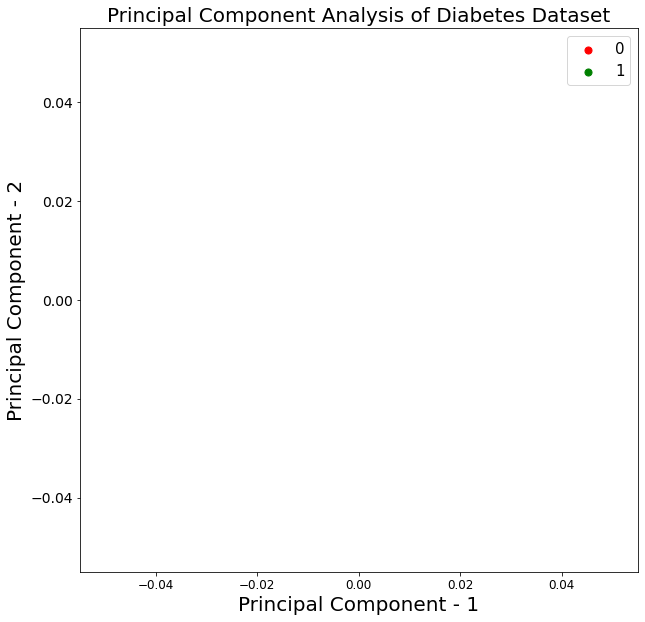

In [ ]:
#Plotting the graph
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)         #x-axis
plt.ylabel('Principal Component - 2',fontsize=20)         #y-axis
plt.title("Principal Component Analysis of Diabetes Dataset",fontsize=20)  #title
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = diabetes_dataset['label'] == target
    plt.scatter(principal_diabetes_DF.loc[indicesToKeep, 'principal component1']
               , principal_diabetes_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

I couldn't figure out why the plot wasn't showing the scatter graphs. But again previous result tells us that the principal component 1 holds 40.2% of the information and the principal component 2 holds 15%.